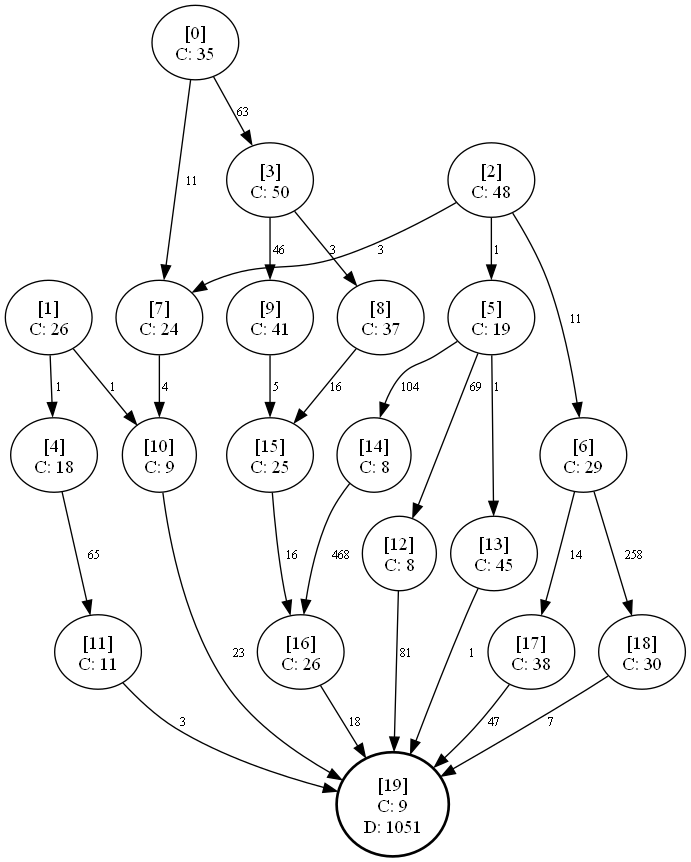

./output/test2.json


In [2]:
# 3. RD-Gen -> scheduling -> Scheduling_Visualization
# scheduler/ directory is simple version of https://github.com/rokamu623/list_scheduling
from src.dag_rd_gen import RDG_DAG
from sample_scheduler.dag import Dag, Node
from sample_scheduler.scheduler import Scheduler
from src.sched_vis_util import SchedVisObj, SchedulingVisualizerUtil
from IPython.display import display

# load dag from RD-Gen
dag_loaded = RDG_DAG.load_from_rd_gen('./sample_input/dag_1.yaml')
display(dag_loaded.img)
# dag_loaded.img.show() # for commandline



# scheduling
dag = Dag(dag_loaded.wcets, dag_loaded.edges)
scheduler = Scheduler(5)
scheduled_nodes: list[Node] = scheduler.schedule_dag(dag)



# visualize
sched_vis_objs: list[SchedVisObj] = []
for node in scheduled_nodes:
    sched_vis_objs.append(SchedVisObj(task_idx=node.idx, start_time=node._start_time, finish_time=node._finish_time, core_idx=node._core))
output_file = SchedulingVisualizerUtil.save(sched_vis_objs, filename='test2')
print(output_file)

# python3 [Scheduling_Visualization]/gannt_chart.py -s [output_file] -d ./output/  -y 'core'